In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nltk
import re
import pprint
import seaborn as sns
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk import collocations
from textblob import TextBlob

In [ ]:
guayaquil = pd.read_csv("tweets_datasetGUAYAQUIL.csv", index_col=0)
quito = pd.read_csv("tweets_datasetQUITO.csv", index_col=0)
cuenca = pd.read_csv("tweets_datasetCUENCA.csv", index_col=0)

In [ ]:
guayaquil["ciudad"] = "Guayaquil"
quito["ciudad"] = "Quito"
cuenca["ciudad"] = "Cuenca"

In [8]:
df = pd.concat([guayaquil, quito, cuenca])

In [52]:
df['polarity'] = df["tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [53]:
df[df["polarity"]>0.0]

,tweet,favorite_count,retweet_count,reply_to,n_user_mentions,n_hashtags,n_urls,user_mentions,hashtags,created_at,ciudad,sentiment,polarity
screen_name,,,,,,,,,,,,,
TuitGuayaco,@miahfmn Ok; ya está me había olvidado.,0,0,miahfmn,1.0,0.0,0.0,miahfmn,NaN,Sat Jun 29 00:32:26 +0000 2019,Guayaquil,0.500000,0.500000
jualomal2,@BoobGlam_com @ddubya1951 @karlaclijster delic...,0,0,BoobGlam_com,3.0,0.0,0.0,BoobGlam_com;ddubya1951;karlaclijster,NaN,Sat Jun 29 00:42:32 +0000 2019,Guayaquil,1.000000,1.000000
LalyArce1110,Me acaban de confirmar algo que me tenía super...,0,0,NaN,0.0,0.0,1.0,NaN,NaN,Sat Jun 29 00:43:43 +0000 2019,Guayaquil,0.333333,0.333333
LalyArce1110,Videos como estos son os que necesitamos en nu...,0,0,NaN,1.0,1.0,1.0,ladivaza,HappyPride,Sat Jun 29 00:54:57 +0000 2019,Guayaquil,1.000000,1.000000
neira_javier,Nemo repente fit pessimus en Guayaquil; Ecuado...,0,0,NaN,0.0,0.0,1.0,NaN,NaN,Sat Jun 29 00:55:07 +0000 2019,Guayaquil,0.400000,0.400000
jualomal2,@Blazin_Chix @BLZ_2HD @Megabom26 @MB26SR Delic...,0,0,Blazin_Chix,4.0,0.0,0.0,Blazin_Chix;BLZ_2HD;Megabom26;MB26SR,NaN,Sat Jun 29 00:57:52 +0000 2019,Guayaquil,0.687500,0.687500
FitoChutaGuanta,@EcuAvPhoto Cool; spotters preparados a 10.000...,0,0,EcuAvPhoto,1.0,0.0,0.0,EcuAvPhoto,NaN,Sat Jun 29 01:04:00 +0000 2019,Guayaquil,0.350000,0.350000
jualomal2,@AxlySuregrip @KristenKobandt @libidorush1 @Si...,0,0,AxlySuregrip,8.0,0.0,1.0,AxlySuregrip;KristenKobandt;libidorush1;SirAld...,NaN,Sat Jun 29 01:12:51 +0000 2019,Guayaquil,1.000000,1.000000
wanderergirlAC,How many money I need to have those gorgeous v...,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 01:16:11 +0000 2019,Guayaquil,0.600000,0.600000


In [54]:
df.to_csv('update_alldataset.csv')

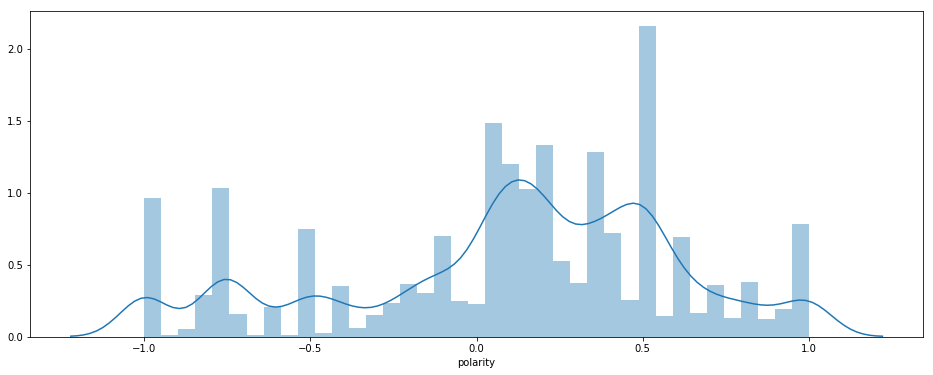

In [55]:
plt.rcParams['figure.figsize'] = [16, 6]
df_lat = df[df["polarity"]!=0.000000000]
sns.distplot(df_lat[df_lat["ciudad"]=="Guayaquil"]["polarity"])

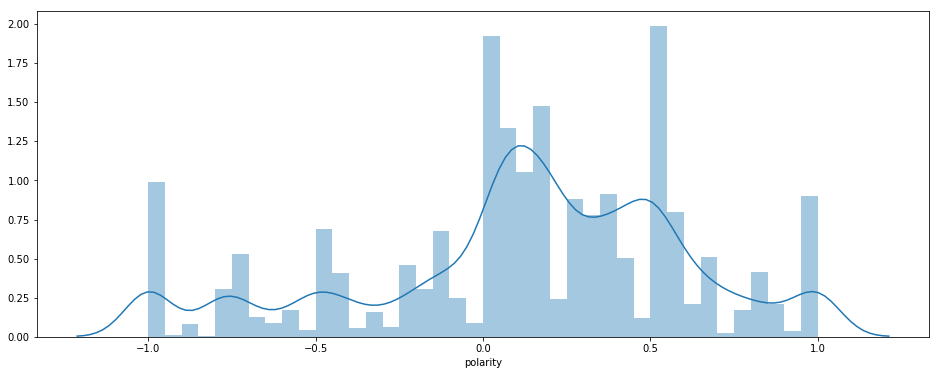

In [56]:
sns.distplot(df_lat[df_lat["ciudad"]=="Quito"]["polarity"])

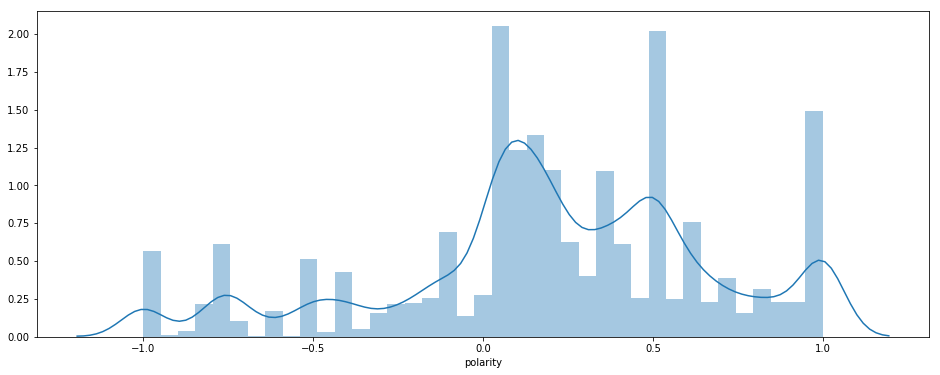

In [57]:
sns.distplot(df_lat[df_lat["ciudad"]=="Cuenca"]["polarity"])

In [58]:
df_lat["polarity"].value_counts()

 0.500000    3495
 0.200000    1818
 0.100000    1736
 1.000000    1652
-1.000000    1575
-0.750000    1345
 0.033333    1226
 0.050000    1204
-0.500000    1144
 0.600000    1026
-0.100000     912
 0.150000     906
 0.250000     758
 0.375000     711
 0.350000     655
 0.700000     623
-0.400000     613
 0.800000     542
 0.333333     522
 0.400000     513
-0.800000     475
 0.416667     429
 0.136364     402
-0.200000     390
 0.300000     338
-0.250000     314
 0.900000     297
-0.600000     252
 0.166667     251
 0.125000     193
             ... 
 0.100000       1
 0.746875       1
 0.296667       1
-0.366667       1
-0.064286       1
 0.167187       1
 0.159091       1
 0.047222       1
 0.578125       1
 0.108750       1
 0.675000       1
-0.433333       1
-0.281818       1
 0.132440       1
-0.750000       1
 0.161905       1
-0.493750       1
 0.489286       1
-0.330966       1
 0.546154       1
 0.302381       1
-0.087500       1
-0.012500       1
 0.162121       1
 0.363889 

In [ ]:
sns.distplot(df_lat[df_lat["ciudad"]=="Guayaquil"]["polarity"], rug=True)
sns.distplot(df_lat[df_lat["ciudad"]=="Quito"]["polarity"], rug=True)
sns.distplot(df_lat[df_lat["ciudad"]=="Cuenca"]["polarity"], rug=True)

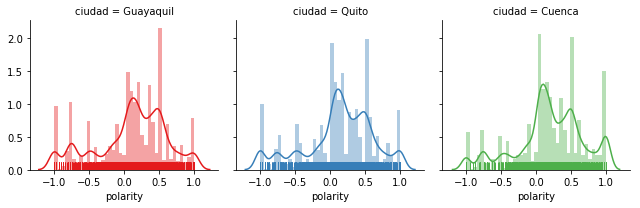

In [60]:
plt.rcParams['figure.figsize'] = [16, 6]
g = sns.FacetGrid(df_lat, col='ciudad', hue="ciudad", palette="Set1")
g = (g.map(sns.distplot, "polarity", rug=True))

In [64]:
df_cities = df_lat[["ciudad","polarity"]].groupby(df_lat["ciudad"]).mean()

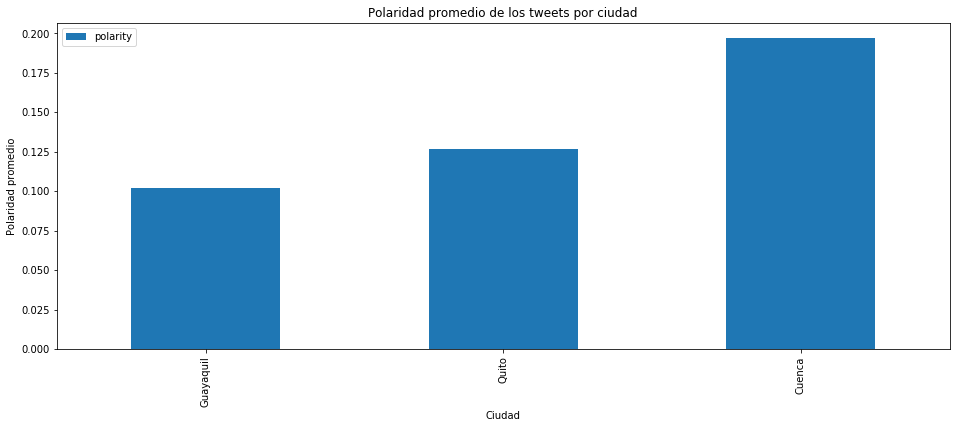

In [72]:
cities = df_cities.sort_values('polarity',ascending = True)
ax =cities.plot(kind='bar', title="Polaridad promedio de los tweets por ciudad")
ax.set(ylabel='Polaridad promedio', xlabel='Ciudad')
plt.show()


In [74]:
df[df["polarity"]>=1.000000000]

,tweet,favorite_count,retweet_count,reply_to,n_user_mentions,n_hashtags,n_urls,user_mentions,hashtags,created_at,ciudad,sentiment,polarity
screen_name,,,,,,,,,,,,,
jualomal2,@BoobGlam_com @ddubya1951 @karlaclijster delic...,0,0,BoobGlam_com,3.0,0.0,0.0,BoobGlam_com;ddubya1951;karlaclijster,NaN,Sat Jun 29 00:42:32 +0000 2019,Guayaquil,1.0,1.0
LalyArce1110,Videos como estos son os que necesitamos en nu...,0,0,NaN,1.0,1.0,1.0,ladivaza,HappyPride,Sat Jun 29 00:54:57 +0000 2019,Guayaquil,1.0,1.0
jualomal2,@AxlySuregrip @KristenKobandt @libidorush1 @Si...,0,0,AxlySuregrip,8.0,0.0,1.0,AxlySuregrip;KristenKobandt;libidorush1;SirAld...,NaN,Sat Jun 29 01:12:51 +0000 2019,Guayaquil,1.0,1.0
Ailander_Drums,@BABYMETAL_JAPAN @Fucking_Hero PAPAYA is awesome!,0,0,BABYMETAL_JAPAN,2.0,0.0,0.0,BABYMETAL_JAPAN;Fucking_Hero,NaN,Sat Jun 29 04:52:43 +0000 2019,Guayaquil,1.0,1.0
spideyjoness,The best thing about the re-release was the St...,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 05:40:32 +0000 2019,Guayaquil,1.0,1.0
izbell_no,@liamgallagher You deserve all this !! The bes...,0,0,liamgallagher,1.0,0.0,0.0,liamgallagher,NaN,Sat Jun 29 06:13:02 +0000 2019,Guayaquil,1.0,1.0
jualomal2,@CerLiis Mommy; your tits are delicious; I wan...,0,0,CerLiis,1.0,0.0,0.0,CerLiis,NaN,Sat Jun 29 14:07:27 +0000 2019,Guayaquil,1.0,1.0
jualomal2,@Real_Whores @Blazin_Chix delicious ass,0,0,Real_Whores,2.0,0.0,0.0,Real_Whores;Blazin_Chix,NaN,Sat Jun 29 14:10:49 +0000 2019,Guayaquil,1.0,1.0
jualomal2,@Titty_Drop delicious ass,0,0,Titty_Drop,1.0,0.0,0.0,Titty_Drop,NaN,Sat Jun 29 14:21:29 +0000 2019,Guayaquil,1.0,1.0
